<a href="https://colab.research.google.com/github/Manisha1896/python/blob/main/Logistic_Regression_with_Python_02Aug_04Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset : https://drive.google.com/file/d/1olAJdeCjqQItZqJnDCBY7PXiv0IBjXvR/view?usp=sharing

# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [ ]:
# upload datafile from your localhost
from google.colab import files
x = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [ ]:
ls

sample_data/  titanic_train.csv


In [ ]:
# import pandas library
import pandas as pd

In [ ]:
# Load titaic_train.csv file in datafrae named df
df = pd.read_csv('titanic_train.csv')

In [ ]:
# Display first 5 records to check how the data look like , means , names of fields, their data type , etc
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [ ]:
# Get details about dataframe (stats)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     861 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

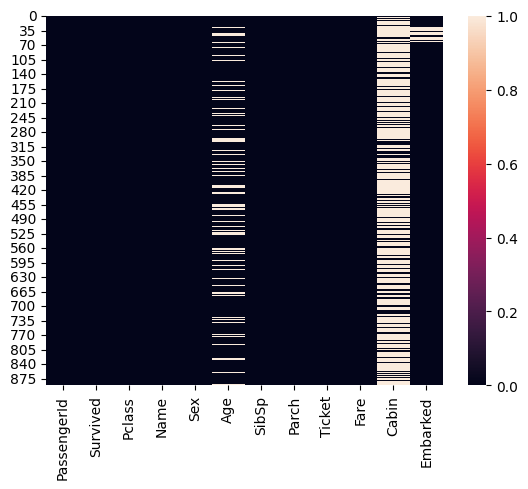

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
891*12

10692

In [ ]:
df['Survived'].unique()

array([0, 1])

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

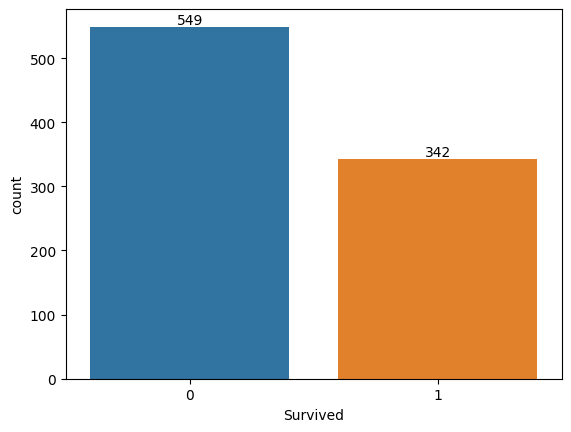

In [ ]:
x = sns.countplot(x='Survived',data=df)
for label in x.containers:
  x.bar_label(label)
plt.show()

In [ ]:
type(x)

matplotlib.axes._axes.Axes

In [ ]:
df['Embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

<Axes: xlabel='Survived', ylabel='count'>

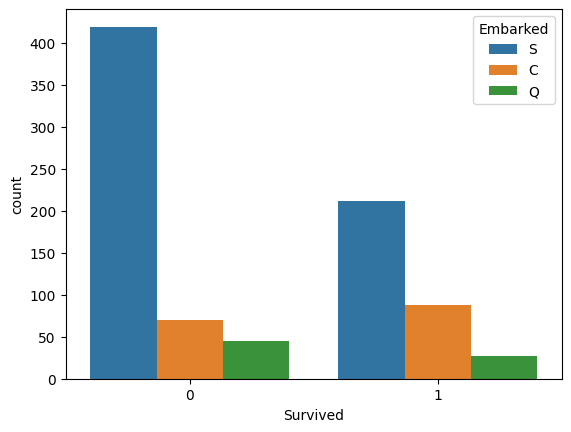

In [ ]:
sns.countplot(x='Survived',data=df,hue='Embarked')

In [ ]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

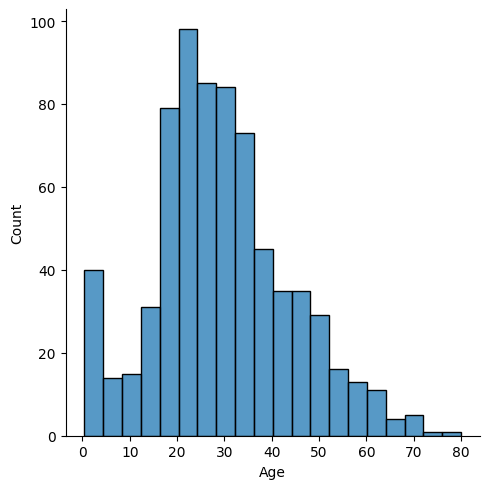

In [ ]:
sns.displot(df['Age'])

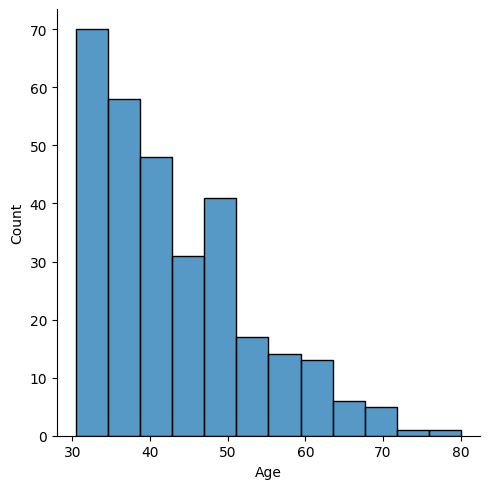

In [ ]:
sns.displot(df[df['Age']>30]['Age'])

In [ ]:
df_test1 = pd.DataFrame(data = {'x':[1,2,3,4,5],'y':[1,2,3,4,5]})

In [ ]:
df_test1

,x,y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [ ]:
df_test1.corr()

,x,y
x,1.0,1.0
y,1.0,1.0


In [ ]:
df_test2 = pd.DataFrame(data = {'x':[1,2,3,4,5],'y':[5,4,3,2,1]})

In [ ]:
df_test2

,x,y
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


In [ ]:
df_test2.corr()

,x,y
x,1.0,-1.0
y,-1.0,1.0


In [ ]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
df.corr()

<ipython-input-47-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df[['Fare','Pclass']].head(10)

,Fare,Pclass
0,7.2500,3
1,71.2833,1
2,7.9250,3
3,53.1000,1
4,8.0500,3
5,8.4583,3
6,51.8625,1
7,21.0750,3
8,11.1333,3
9,30.0708,2


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pd.get_dummies(df['Sex'],drop_first=True).head()  # get_dummies generate numeric values

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
gender = pd.get_dummies(df['Sex'],drop_first=True) # store output of get_dummies in a variable

In [ ]:
df.drop('Sex',axis=1,inplace=True) # remove Sex column from dataframe , as we need to replace it with numeric values

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = pd.concat([df,gender],axis=1) # concat df 11 columns with numeric values which we generated for Sex as replacement

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,NaN,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
df.corr() # correlation between  Survived and male is greater than zero , it means these are correlated columns

<ipython-input-29-424df5a1835b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # correlation between  Survived and male is greater than zero , it means these are correlated columns


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


In [ ]:
df.drop('PassengerId',axis=1,inplace=True) # We can remove PassengerId column as it is non-correlated column

In [ ]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,male
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


In [ ]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,NaN,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
df.drop(['Name','Cabin','Ticket'],axis=1,inplace=True) # We can remove PassengerId column as it is non-correlated column

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,NaN,0
4,0,3,35.0,0,0,8.0500,S,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  861 non-null    object 
 7   male      891 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 49.7+ KB


In [ ]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,male
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


In [ ]:
df.groupby('Pclass').mean()['Age']

<ipython-input-45-3be499f346ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Pclass').mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return  38
    elif pclass == 2:
      return 30
    else:
      return 25
  else:
    return age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  861 non-null    object 
 7   male      891 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 49.7+ KB


In [ ]:
df2 = df.dropna(axis=0)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  861 non-null    int64  
 1   Pclass    861 non-null    int64  
 2   Age       861 non-null    float64
 3   SibSp     861 non-null    int64  
 4   Parch     861 non-null    int64  
 5   Fare      861 non-null    float64
 6   Embarked  861 non-null    object 
 7   male      861 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 54.7+ KB


In [ ]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
4,0,3,35.0,0,0,8.0500,S,1
6,0,1,54.0,0,0,51.8625,S,1


In [ ]:
embarked = pd.get_dummies(df2['Embarked'],drop_first=True)  # get_dummies generate numeric values

In [ ]:
embarked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q       861 non-null    uint8
 1   S       861 non-null    uint8
dtypes: uint8(2)
memory usage: 8.4 KB


In [ ]:
df2.drop('Embarked',axis=1,inplace=True)

<ipython-input-93-2c3d14fc8b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('Embarked',axis=1,inplace=True)


In [ ]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
4,0,3,35.0,0,0,8.0500,1
6,0,1,54.0,0,0,51.8625,1


In [ ]:
df2 = pd.concat([df2,embarked],axis=1)

In [ ]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
6,0,1,54.0,0,0,51.8625,1,0,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  861 non-null    int64  
 1   Pclass    861 non-null    int64  
 2   Age       861 non-null    float64
 3   SibSp     861 non-null    int64  
 4   Parch     861 non-null    int64  
 5   Fare      861 non-null    float64
 6   male      861 non-null    uint8  
 7   Q         861 non-null    uint8  
 8   S         861 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 49.6 KB


In [ ]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
6,0,1,54.0,0,0,51.8625,1,0,1


In [ ]:
x = df2.drop('Survived',axis=1) # input columns (Independent variabls)
y = df2['Survived'] # Target column (Dependent variable)

In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
6,1,54.0,0,0,51.8625,1,0,1


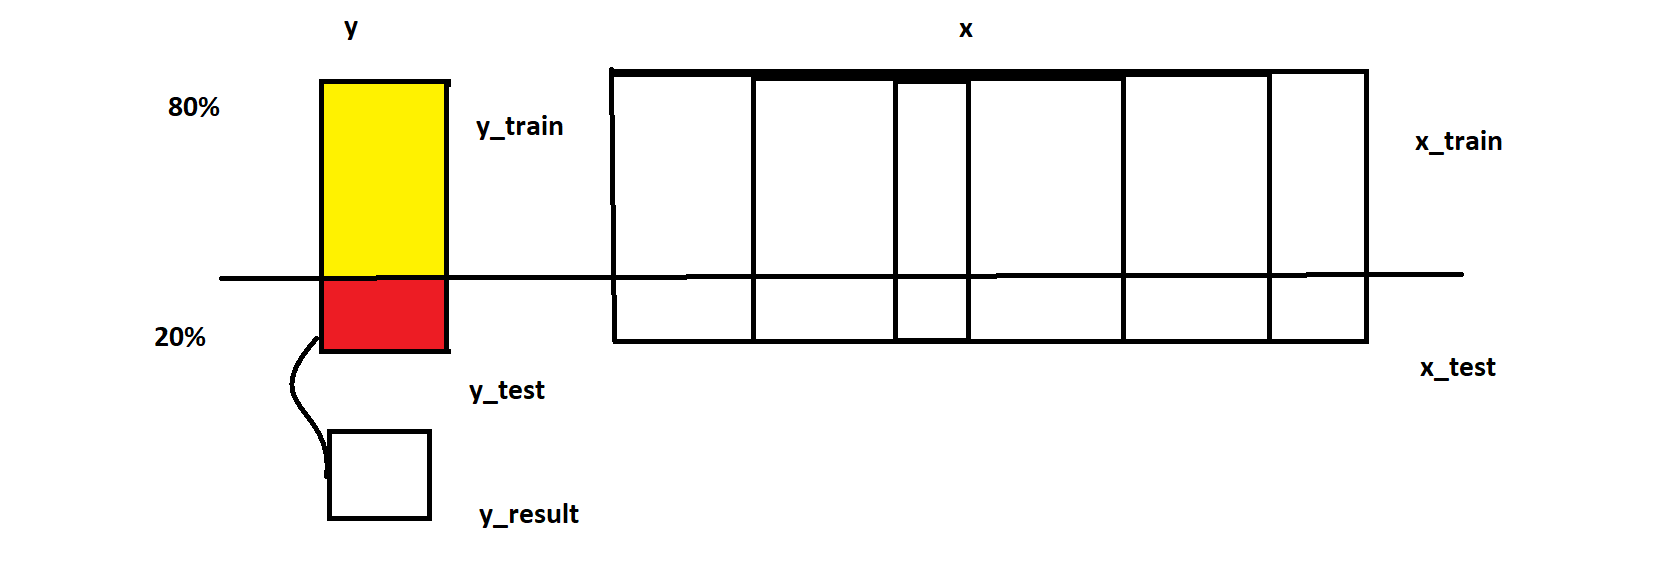

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [ ]:
x_train.shape

(688, 8)

In [ ]:
x_test.shape

(173, 8)

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict = log.predict(x_test)

In [ ]:
predict

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y_test

359    1
149    0
703    0
18     0
181    0
      ..
298    1
403    0
466    0
884    0
704    0
Name: Survived, Length: 173, dtype: int64

## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,predict)

array([[95, 19],
       [12, 47]])

In [ ]:
(95+47)/173 # accuracy score

0.8208092485549133

In [ ]:
(19+12)/173 # error score

0.1791907514450867

In [ ]:
accuracy_score(y_test,predict)

0.8208092485549133

In [ ]:
accuracy_score(y_test,predict)*100

82.08092485549133